In [11]:
import torch
def describe(x):
    print('타입 {}'.format(x.type()))
    print('크기 {}'.format(x.shape))
    print('값 \n{}'.format(x))

x = torch.FloatTensor([[1,2],[3,4]])
describe(x)


타입 torch.FloatTensor
크기 torch.Size([2, 2])
값 
tensor([[1., 2.],
        [3., 4.]])


In [17]:
torch.FloatTensor([1.0])

tensor([1.])

In [12]:
import random
random.uniform(0.8, 1.0)

0.9556809561788133

In [14]:
generate_real()

tensor([0.9365, 0.0428, 0.9065, 0.1284])

In [19]:
generate_random(4)

tensor([0.9990, 0.6812, 0.6118, 0.7273])

In [1]:
import torch
import random

# real 이미지 생성 함수
def generate_real():         # 범위 안에 있는 데이터가 생성됨
    # random.uniform(a, b)
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)]
    )
    return real_data

# random 이미지 생성 함수
def generate_random(size):
    # 평균 0 표준편차 1인 정규분포 난수 생성
    random_data = torch.rand(size)
    return random_data


# real과 random은 데이터 패턴이 다름

In [2]:
import torch.nn as nn
import pandas as pd

# 판별모형
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4,3),    # 4개 숫자 input
            nn.Sigmoid(),
            nn.Linear(3,1),    # 마지막 1개 (0/1 가짜/진짜)
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)    
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print('counter=', self.counter)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        

In [4]:
D = Discriminator()

for i in range(10000):
    # real image
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake image
    D.train(generate_random(4), torch.FloatTensor([0.0]))

print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

counter= 10000
counter= 20000
0.750215470790863
0.08804041147232056


In [20]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

# 0.8194554448127747      진짜데이터가 1일 확률이 81%
# 0.024130597710609436    가짜데이터가 1일 확률이 2%

0.8194554448127747
0.024130597710609436


In [5]:
# 생성모형

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1,3),
            nn.Sigmoid(),
            nn.Linear(3,4),
            nn.Sigmoid()
        )
        
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)    
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

G = Generator()
G.forward(torch.FloatTensor([0.5]))
        

tensor([0.4718, 0.6862, 0.6513, 0.5550], grad_fn=<SigmoidBackward0>)

In [21]:
torch.FloatTensor([0.5])

tensor([0.5000])

In [23]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.6552, 0.1579, 0.7361, 0.2188], grad_fn=<SigmoidBackward0>)

In [22]:
G.forward(torch.FloatTensor([0.5])).detach()

tensor([0.6552, 0.1579, 0.7361, 0.2188])

In [7]:
D = Discriminator()
G = Generator()
image_list = []
for i in range(10000):
    # 판별모형 학습(true)
    D.train(generate_real(), torch.FloatTensor([1.0]))

    # 판별모형 학습(false)
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    # 생성모형학습
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))   # 잘못된 정보를 계속 제공

    if i % 1000 == 0:
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

counter= 10000
counter= 20000


In [8]:
G.forward(torch.FloatTensor([0.5]))    
# 훈련이 끝나고 보니, [0.8 0.2 0.8 0.2] (진짜데이터 패턴)에 근접한 결과를 내놓고 있음

tensor([0.6552, 0.1579, 0.7361, 0.2188], grad_fn=<SigmoidBackward0>)

In [9]:
image_list  # 생성된 패턴

[array([0.3631319 , 0.3314959 , 0.46434212, 0.48480612], dtype=float32),
 array([0.36359835, 0.3295761 , 0.46727985, 0.48485368], dtype=float32),
 array([0.36552274, 0.32605368, 0.47276288, 0.48379442], dtype=float32),
 array([0.37069348, 0.31940493, 0.48290485, 0.47958964], dtype=float32),
 array([0.38203833, 0.30749774, 0.50050306, 0.46835124], dtype=float32),
 array([0.40248474, 0.28931326, 0.5270898 , 0.44627577], dtype=float32),
 array([0.4332192 , 0.2662074 , 0.5614734 , 0.41287047], dtype=float32),
 array([0.47434387, 0.24027242, 0.60142666, 0.3702602 ], dtype=float32),
 array([0.5259178 , 0.21295333, 0.6449855 , 0.3213585 ], dtype=float32),
 array([0.58735234, 0.18513511, 0.6905783 , 0.2694485 ], dtype=float32)]

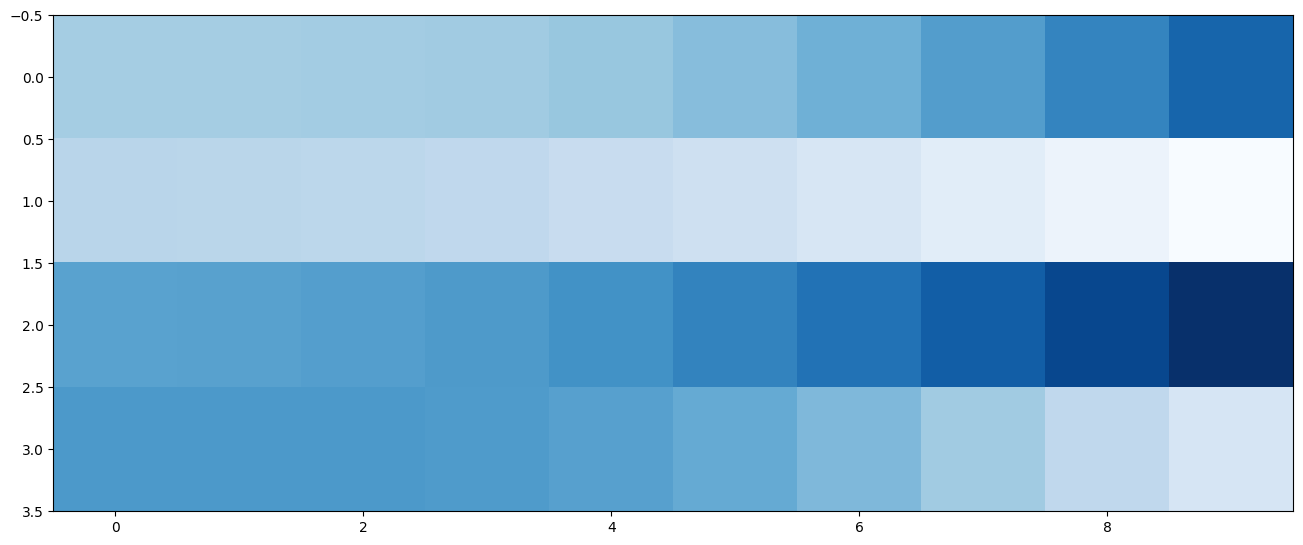

In [10]:
import matplotlib.pyplot as plt

import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
plt.figure(figsize = (16,8))
plt.imshow(np.array(image_list).T, interpolation='none', cmap='Blues')
plt.show()

